In [231]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, precision_score, recall_score, f1_score, r2_score
from sklearn.preprocessing import StandardScaler
import random
import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import time

## Classification Data

In [45]:
df = pd.read_csv("WineQT.csv")
df.drop('Id',axis=1,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
X = df.drop(columns=['quality'])
y = df['quality']

y = np.array(y)

X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_wine, X_val_wine, y_train_wine, y_val_wine = train_test_split(X_train_wine, y_train_wine, test_size=0.2, random_state=42)

In [47]:
X_train_wine.fillna(X_train_wine.mean(), inplace=True)
X_val_wine.fillna(X_val_wine.mean(), inplace=True)
X_test_wine.fillna(X_test_wine.mean(), inplace=True)

std_scaler = StandardScaler()  
X_train_wine = std_scaler.fit_transform(X_train_wine)
X_val_wine = std_scaler.transform(X_val_wine)
X_test_wine = std_scaler.transform(X_test_wine)

## Regression Data

In [48]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [49]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

y = np.array(y)

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_housing, X_val_housing, y_train_housing, y_val_housing = train_test_split(X_train_housing, y_train_housing, test_size=0.2, random_state=42)

In [50]:
X_train_housing.fillna(X_train_housing.mean(), inplace=True)
X_val_housing.fillna(X_val_housing.mean(), inplace=True)
X_test_housing.fillna(X_test_housing.mean(), inplace=True)


std_scaler = StandardScaler()  
X_train_housing = std_scaler.fit_transform(X_train_housing)
X_val_housing = std_scaler.transform(X_val_housing)
X_test_housing = std_scaler.transform(X_test_housing)

y_train_housing = y_train_housing.reshape(-1,1)
y_test_housing = y_test_housing.reshape(-1,1)
y_val_housing = y_val_housing.reshape(-1,1)

## List-1 Models

### 1) Decision Tree

1.1) Classifier

In [51]:
# ChatGPT: Write code to tune DecisionTreeClassifier

criteria = ['gini', 'entropy']
max_depth_values = [None, 5, 10, 15, 20]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

best_accuracy = 0
best_params = {}

for criterion in criteria:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                decision_tree_classifier = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )

                decision_tree_classifier.fit(X_train_wine, y_train_wine)
                y_pred = decision_tree_classifier.predict(X_val_wine)
                accuracy = accuracy_score(y_val_wine, y_pred)
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        "criterion": criterion,
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf
                    }

In [52]:
print("Best Accuracy on tuning Decision-Tree Classifier is: " + str(best_accuracy*100)+"%")
print("Best Parameters on tuning Decision-Tree Classifier is: " + str(best_params))

Best Accuracy on tuning Decision-Tree Classifier is: 61.74863387978142%
Best Parameters on tuning Decision-Tree Classifier is: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}


1.2) Regression

In [53]:
# ChatGPT: Write code to tune DecisionTreeRegressor

max_depth_values = [None, 5, 10, 15, 20]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

best_mse = float('inf')
best_params = {}

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            decision_tree_regressor = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            
            decision_tree_regressor.fit(X_train_housing, y_train_housing)

            y_pred = decision_tree_regressor.predict(X_val_housing)

            mse = mean_squared_error(y_val_housing, y_pred)
            
            if mse < best_mse:
                best_mse = mse
                best_params = {
                    "max_depth": max_depth,
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf
                }

In [54]:
print("Best MSE on tuning Decision-Tree Classifier is: " + str(best_mse))
print("Best Parameters on tuning Decision-Tree Classifier is: " + str(best_params))

Best MSE on tuning Decision-Tree Classifier is: 19.470934016327153
Best Parameters on tuning Decision-Tree Classifier is: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1}


### 3) Multi-Layer Perceptron

3.1) Classifier

In [114]:
# ChatGPT: Write a basic MLP Class using activations, optimizers, hidden layers ...
class MLPClassifier:
    def __init__(self, X, y, learning_rate, activation_fn, num_layers, hidden_layer_sizes, epochs, optimizer='minibatch', output_size = 6):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.activation = activation_fn
        self.num_layers = num_layers
        self.hidden_layer_sizes = hidden_layer_sizes
        self.epochs = epochs
        self.output_size = output_size
        if(optimizer == 'sgd'):
            self.optimizer = self.stochastic_gradient_descent
        elif(optimizer == 'batch'):
            self.optimizer = self.batch_gradient_descent
        else:
            self.optimizer = self.minibatch_gradient_descent
    
    def one_hot_encode(self, y):
        max_label_num = 6
        one_hot_matrix = np.zeros((len(y), max_label_num), dtype=int)
        for i in range(len(y)):
            one_hot_matrix[i, y[i] - 3] = 1
        return one_hot_matrix
    
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15  
        return -np.mean(y_true * np.log(y_pred + epsilon))
    
    def get_loss(self, X, y):
        y = self.one_hot_encode(y)
        self.forward_propagation(X)
        self.cross_entropy_loss(y, self.output)

    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) 
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def initialize_params(self):
        layers = [self.X.shape[1]] + self.hidden_layer_sizes + [self.output_size]

        self.weights = [np.random.randn(layers[i], layers[i+1]) for i in range(0,len(layers)-1)]
        self.biases = [np.zeros((1, layers[i])) for i in range(1,len(layers))]
        
    def derivative_activation(self, x):
        if self.activation == 'relu':
            return (x > 0).astype(float)
        elif self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'tanh':
            return 1 - x**2
    
    def forward_propagation(self, X):
        self.activations = []
        activation_output = -1
        layer_input = X
        self.activations.append(layer_input)
        for i in range(len(self.hidden_layer_sizes)+1):
            layer_output = np.dot(layer_input, self.weights[i]) + self.biases[i]
            if self.activation == 'relu':
                activation_output = self.relu(layer_output)
            elif self.activation == 'sigmoid':
                activation_output = self.sigmoid(layer_output)
            elif self.activation == 'tanh':
                activation_output = self.tanh(layer_output)
            self.activations.append(activation_output)
            layer_input = activation_output

        self.output = self.softmax(self.activations[-1])
        return self.output

    def accuracy(self, y_pred, y):
        return accuracy_score(y_pred,y)

    def backward_propagation(self, y):
        gradient_weights = [np.zeros(w.shape) for w in self.weights]
        gradient_biases = [np.zeros(b.shape) for b in self.biases]
        error = (self.output - y) *  self.derivative_activation(self.activations[-1])
        for i in range(1,len(self.weights)+1):
            gradient_weights[-i] = (self.activations[-i-1].T.dot(error))/len(y)
            gradient_biases[-i] = np.sum(error, axis=0, keepdims=True)/len(y)
            if(i!=len(self.weights)):
                error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))
        return gradient_weights , gradient_biases

    def batch_gradient_descent(self):
        for epoch in range(self.epochs):
            self.forward_propagation(self.X)
            gradient_weights, gradient_biases = self.backward_propagation(self.y)
            train_loss = self.cross_entropy_loss(self.y,self.output)
            self.train_losses.append(train_loss)
            for i in range(len(self.weights)):
                self.weights[i] -= self.learning_rate * gradient_weights[i]
                self.biases[i] -= self.learning_rate * gradient_biases[i]

    def minibatch_gradient_descent(self):
        batch_size = 8
        for epoch in range(self.epochs):
            X_batches = np.array_split(self.X,len(self.X)/batch_size)
            Y_batches = np.array_split(self.y,len(self.y)/batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.forward_propagation(batch_x)
                grad_w, grad_b = self.backward_propagation(batch_y)
                for i in range(len(self.weights)):
                    self.weights[i] -= self.learning_rate * grad_w[i]
                    self.biases[i] -= self.learning_rate * grad_b[i]
            self.forward_propagation(self.X)
            self.train_losses.append(self.cross_entropy_loss(self.y,self.output))
    
    def stochastic_gradient_descent(self):
        batch_size = 1
        for epoch in range(self.epochs):
            X_batches = np.array_split(self.X,len(self.X)/batch_size)
            Y_batches = np.array_split(self.y,len(self.y)/batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.forward_propagation(batch_x)
                grad_w, grad_b = self.backward_propagation(batch_y)
                for i in range(len(self.weights)):
                    self.weights[i] -= self.learning_rate * grad_w[i]
                    self.biases[i] -= self.learning_rate * grad_b[i]
            self.forward_propagation(self.X)
            self.train_losses.append(self.cross_entropy_loss(self.y,self.output))
            
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.y = self.one_hot_encode(y)
        self.initialize_params()
        self.train_losses = []
        self.optimizer()

    def predict(self, X):
        predictions = self.forward_propagation(X)
        predicted_labels = np.argmax(predictions, axis=1) + 3

        return predicted_labels
    
    def predict_proba(self, X):
        probabilities = self.forward_propagation(X)
        return probabilities

    def calculate_metrics(self, X, y):
        predictions = self.forward_propagation(X)
        predicted_labels = np.argmax(predictions, axis=1) + 3
        return accuracy_score(y,predicted_labels), precision_score(y,predicted_labels,zero_division=1,average='weighted'), recall_score(y,predicted_labels,zero_division=1,average='weighted'), f1_score(y,predicted_labels,zero_division=1,average='weighted')
    
    def calculate_report(self, X, y):
        predictions = self.forward_propagation(X)

        predicted_labels = np.argmax(predictions, axis=1) + 3
        report = classification_report(y, predicted_labels,zero_division=1)
        return report
    
    def get_params(self, deep=True):
        return {
            'X': self.X,
            'y': self.y,
            'learning_rate': self.learning_rate,
            'activation_fn': self.activation,
            'num_layers': self.num_layers,
            'hidden_layer_sizes': self.hidden_layer_sizes,
            'epochs': self.epochs,
            'optimizer': self.optimizer,
            'output_size': self.output_size
        }

In [116]:
# ChatGPT : Write code to tune MLPClassifier model

learning_rates = [0.01, 0.1, 0.5]
num_layers_list = [2, 2, 3]
hidden_layer_sizes_list = [[8, 8], [128, 128], [64, 32, 16]]
epochs_list = [100, 500]
activations = ['tanh', 'relu', 'sigmoid']
best_accuracy = 0
best_params = {}

for learning_rate in learning_rates:
    for activation in activations:
        for hidden_layer_sizes in hidden_layer_sizes_list:
            for epochs in epochs_list:
                mlp = MLPClassifier(X, y, learning_rate, activation, len(hidden_layer_sizes), hidden_layer_sizes, epochs)
                # Train the model
                mlp.fit(X_train_wine, y_train_wine)
                # Evaluate the model
                accuracy, _, _, _ = mlp.calculate_metrics(X_val_wine, y_val_wine)
                
                # Check if current parameters give better accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'learning_rate': learning_rate,
                        'num_layers': len(hidden_layer_sizes),
                        'hidden_layer_sizes': hidden_layer_sizes,
                        'activation': activation,
                        'epochs': epochs
                    }

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.6174863387978142
Best Parameters: {'learning_rate': 0.01, 'num_layers': 2, 'hidden_layer_sizes': [8, 8], 'activation': 'relu', 'epochs': 100}


3.2) Regression

In [155]:
class MLPRegression:
    def __init__(self, X, y, learning_rate, activation_fn, num_layers, hidden_layer_sizes, epochs, optimizer='minibatch', loss_fn='MSE',output_size = 1):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.activation = activation_fn
        self.num_layers = num_layers
        self.hidden_layer_sizes = hidden_layer_sizes
        self.epochs = epochs
        self.output_size = output_size
        if(optimizer == 'sgd'):
            self.optimizer = self.stochastic_gradient_descent
        elif(optimizer == 'batch'):
            self.optimizer = self.batch_gradient_descent
        else:
            self.optimizer = self.minibatch_gradient_descent
        
        self.loss = self.MSE            
    
    def MSE(self, y_true, y_pred):
        mse = np.mean((y_true - y_pred) ** 2)
        return mse
    
    def RMSE(self, y_true):
        mse = self.MSE(y_true,self.output)
        rmse = np.sqrt(mse)
        return rmse
    
    def R_squared(self, y_true):
        mean_y = np.mean(y_true)
        ss_tot = np.sum((y_true - mean_y) ** 2)
        ss_res = np.sum((y_true - self.output) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def initialize_params(self):
        layers = [self.X.shape[1]] + self.hidden_layer_sizes + [self.output_size]

        self.weights = [np.random.randn(layers[i], layers[i+1]) for i in range(0,len(layers)-1)]
        self.biases = [np.zeros((1, layers[i])) for i in range(1,len(layers))]
        
    def derivative_activation(self, x):
        if self.activation == 'relu':
            return (x > 0).astype(float)
        elif self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'tanh':
            return 1 - x**2
    
    def forward_propagation(self, X):
        self.activations = []
        activation_output = -1
        layer_input = X
        self.activations.append(layer_input)
        for i in range(len(self.hidden_layer_sizes)+1):
            layer_output = np.dot(layer_input, self.weights[i]) + self.biases[i]
            if self.activation == 'relu':
                activation_output = self.relu(layer_output)
            elif self.activation == 'sigmoid':
                activation_output = self.sigmoid(layer_output)
            elif self.activation == 'tanh':
                activation_output = self.tanh(layer_output)
            self.output = layer_output
            if(i==len(self.hidden_layer_sizes)):
                self.activations.append(layer_output)
                break
            self.activations.append(activation_output)
            layer_input = activation_output
        return self.output

    def accuracy(self, y_pred, y):
        return accuracy_score(y_pred,y)

    def backward_propagation(self, y):
        y = y.reshape(-1,1)
        gradient_weights = [np.zeros(w.shape) for w in self.weights]
        gradient_biases = [np.zeros(b.shape) for b in self.biases]
        error = (self.output - y) * 2
        for i in range(1,len(self.weights)+1):
            gradient_weights[-i] = (self.activations[-i-1].T.dot(error))/len(y)
            gradient_biases[-i] = np.sum(error, axis=0, keepdims=True)/len(y)
            if(i!=len(self.weights)):
                error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))

        return gradient_weights , gradient_biases
    

    def batch_gradient_descent(self):
        for epoch in range(self.epochs):
            self.forward_propagation(self.X)
            gradient_weights, gradient_biases = self.backward_propagation(self.y)
            train_loss = self.loss(self.y,self.output)
            self.train_losses.append(train_loss)
            for i in range(len(self.weights)):
                self.weights[i] -= self.learning_rate * gradient_weights[i]
                self.biases[i] -= self.learning_rate * gradient_biases[i]

    def minibatch_gradient_descent(self):
        batch_size = 8
        for epoch in range(self.epochs):
            X_batches = np.array_split(self.X,len(self.X)/batch_size)
            Y_batches = np.array_split(self.y,len(self.y)/batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.forward_propagation(batch_x)
                grad_w, grad_b = self.backward_propagation(batch_y)
                for i in range(len(self.weights)):
                    self.weights[i] -= self.learning_rate * grad_w[i]
                    self.biases[i] -= self.learning_rate * grad_b[i]
            self.forward_propagation(self.X)
            self.train_losses.append(self.loss(self.y,self.output))
    
    def stochastic_gradient_descent(self):
        batch_size = 1
        for epoch in range(self.epochs):
            X_batches = np.array_split(self.X,len(self.X)/batch_size)
            Y_batches = np.array_split(self.y,len(self.y)/batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                self.forward_propagation(batch_x)
                grad_w, grad_b = self.backward_propagation(batch_y)
                for i in range(len(self.weights)):
                    self.weights[i] -= self.learning_rate * grad_w[i]
                    self.biases[i] -= self.learning_rate * grad_b[i]
            self.forward_propagation(self.X)
            self.train_losses.append(self.loss(self.y,self.output))
            
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.initialize_params()
        self.train_losses = []
        self.optimizer()

    def calculate_metrics(self, X, y):
        predictions = self.forward_propagation(X)
        return self.loss(y, predictions)
    
    def calculate_report(self, X, y):
        predictions = self.forward_propagation(X)
        predicted_labels = np.argmax(predictions, axis=1) + 3
        report = classification_report(y, predicted_labels,zero_division=1)
        return report
    
    def predict(self, X):
        predictions = self.forward_propagation(X)
        return predictions

    def get_params(self):
        params = {
            'X': self.X,
            'y': self.y,
            'learning_rate': self.learning_rate,
            'activation_fn': self.activation,
            'num_layers': self.num_layers,
            'hidden_layer_sizes': self.hidden_layer_sizes,
            'epochs': self.epochs,
            'optimizer': 'sgd' if self.optimizer == self.stochastic_gradient_descent else ('batch' if self.optimizer == self.batch_gradient_descent else 'minibatch'),
            'loss_fn': 'MSE' if self.loss == self.MSE else 'other_loss_fn', 
            'output_size': self.output_size
        }
        return params

In [162]:
# ChatGPT : Write code to tune MLPRegression model

learning_rates = [0.001, 0.01, 0.1]
hidden_layer_sizes_values = [[8, 8], [16, 16], [32,32]]
activations = ['sigmoid', 'relu', 'tanh']
epochs_values = [100, 200, 300]

best_loss = float('inf')
best_params = {}

for lr in learning_rates:
    for hidden_layer_sizes in hidden_layer_sizes_values:
        for activation in activations:
            for epochs in epochs_values:
                model = MLPRegression(X_train_housing, y_train_housing, lr, activation, len(hidden_layer_sizes), hidden_layer_sizes, epochs, 'minibatch','MSE',1)
                model.fit(X_train_housing, y_train_housing)
                loss = model.calculate_metrics(X_val_housing, y_val_housing)
                
                # Check if current parameters give better results
                if loss < best_loss:
                    best_loss = loss
                    best_params = {
                        'learning_rate': lr,
                        'hidden_layer_sizes': hidden_layer_sizes,
                        'activation': activation,
                        'epochs': epochs
                    }

print("Best loss:", best_loss)
print("Best parameters:", best_params)

/var/folders/z6/m0l9ypjs6z39w60tv7__dxhc0000gn/T/ipykernel_1291/2446772949.py:92: RuntimeWarning: invalid value encountered in multiply
  error = self.derivative_activation(self.activations[-i-1])*(error.dot(self.weights[-i].T))
/Users/mitanshk/.pyenv/versions/3.11.4/lib/python3.11/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Best loss: 16.55361517486392
Best parameters: {'learning_rate': 0.001, 'hidden_layer_sizes': [16, 16], 'activation': 'relu', 'epochs': 300}


In [133]:
class MultiClassRegression:
    def __init__(self, X, y_true, learning_rate = 0.01, epochs = 2000):
        self.X = X    
        self.y_true = y_true
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def one_hot_encode(self, y):
        max_label_num = 6
        one_hot_matrix = np.zeros((len(y), max_label_num))
        one_hot_matrix[np.arange(len(y)), np.array(y) - 3] = 1
        
        return one_hot_matrix

    def fit(self, X, y):
        self.X = X
        self.y_true = y
        self.y_true = self.one_hot_encode(self.y_true)
        self.weights, self.bias = self.gradient_descent(self.learning_rate, self.epochs)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-15  
        return -np.mean(y_true * np.log(y_pred + epsilon))
    
    def accuracy_reg(self, y_true, y_pred):
        num_correct = np.sum(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))
        return num_correct / y_true.shape[0]

    def evaluate_loss(self, X, y):
        y_pred = np.argmax(self.predict(X),axis=1)+3
        return self.cross_entropy_loss(y, y_pred)

    def predict(self, X):
        y_pred = self.predict_proba(X)
        y_pred = np.argmax(y_pred,axis=1)+3
        return y_pred

    def gradient_descent(self, learning_rate=1e-2, num_iterations=2000):
        num_samples, num_features = self.X.shape
        num_classes = self.y_true.shape[1]
        
        weights = np.zeros((num_features, num_classes))
        bias = np.zeros(num_classes)
        for i in range(num_iterations):
            z = np.dot(self.X, weights) + bias
            y_pred = self.softmax(z)
            gradient = np.dot(self.X.T, (y_pred - self.y_true)) / num_samples
            weights -= learning_rate * gradient
            bias -= learning_rate * np.sum(y_pred - self.y_true,axis=0) / num_samples
            loss = self.cross_entropy_loss(self.y_true, y_pred)
        return weights, bias

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) 
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def evaluate_accuracy(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

    def evaluate_metrics(self, X, y):
        y_pred = np.argmax(self.predict(X),axis=1)+3
        return classification_report(y, y_pred,zero_division=1)
    
    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_prob = self.softmax(z)
        return y_prob
    
    def get_params(self, deep=True):
        return {
            'X': self.X,
            'y_true': self.y_true,
            'learning_rate': self.learning_rate,
            'epochs': self.epochs
        }

In [134]:
# ChatGPT: Write code to tune MultiClassRegression

learning_rates = [0.001, 0.01, 0.1]
epoch_values = [1000, 2000, 3000]

best_accuracy = 0
best_params = {}

for lr in learning_rates:
    for epochs in epoch_values:
        classifier = MultiClassRegression(X_train_wine, y_train_housing, learning_rate=lr, epochs=epochs)
        classifier.fit(X_train_wine, y_train_wine)
        
        # Evaluate the model
        accuracy = classifier.evaluate_accuracy(X_val_wine, y_val_wine)
        
        # Check if current parameters give better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {
                'learning_rate': lr,
                'epochs': epochs
            }

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

Best Accuracy: 0.5519125683060109
Best Parameters: {'learning_rate': 0.1, 'epochs': 1000}


In [210]:
# ChatGPT: Write code for BaggingClassifier

class BaggingClassifier():
    def __init__(self, base_estimator, n_estimators, max_samples, bootstrap, voting="hard", base_est_name="DT"):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.bootstrap = bootstrap
        self.voting = voting
        self.base_est_name = base_est_name

    def fit(self, X, y):
        self.estimators = []
        num_samples = len(X)
        for _ in range(self.n_estimators):
            if self.bootstrap:
                sample_indices = [random.randint(0, num_samples - 1) for _ in range(int(self.max_samples * num_samples))]
            else:
                sample_indices = random.sample(range(num_samples), int(self.max_samples * num_samples))
            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]
            
            # ChatGPT Code: given set of labels not in given X, y array made after sampling, write code to sample 1 sample of each such data point and add it to your data
            if(len(np.unique(y_sampled))!=6):
                missing_labels = set(np.unique(y))-set(np.unique(y_sampled))
                for label in missing_labels:
                    idx = np.where(y == label)
                    if len(idx[0]) > 0:  
                        sample = np.random.choice(idx[0], 1, replace=False)
                        X = np.vstack((X, np.reshape(X[sample], (1, -1))))
                        y = np.concatenate((y, np.reshape(y[sample], -1)))
                

            estimator = self.base_estimator.__class__(**self.base_estimator.get_params())

            estimator.fit(X_sampled, y_sampled)
            self.estimators.append(estimator)
        
    def predict(self, X):
        if self.voting == "hard":
            predictions = [estimator.predict(X) for estimator in self.estimators]
            return np.round(np.mean(predictions, axis=0))
        elif self.voting == "soft":
            probabilities = [estimator.predict_proba(X) for estimator in self.estimators]
            max_num_classes = 6
            for i, prob_matrix in enumerate(probabilities):
                    zeros_to_add = max_num_classes - prob_matrix.shape[1]
                    probabilities[i] = np.pad(prob_matrix, ((0, 0), (0, zeros_to_add)), mode='constant')
            mean_probabilities = np.mean(probabilities, axis=0)
            return np.argmax(mean_probabilities, axis=1)+3

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [213]:
bagging_classifier = BaggingClassifier(DecisionTreeClassifier(max_depth=15,max_features=6,max_leaf_nodes=6), 20, 0.25, True, "soft")

bagging_classifier.fit(X_train_wine, y_train_wine)
bagging_classifier.accuracy(X_test_wine, y_test_wine)

0.5589519650655022

In [126]:
bagging_classifier = BaggingClassifier(MLPClassifier(X_train_wine, y_train_wine, 0.01, 'relu', 2, [8, 8], 100, 'minibatch', 6), 10, 0.85, True, "soft")
bagging_classifier.fit(X_train_wine, y_train_wine)
bagging_classifier.accuracy(X_val_wine, y_val_wine)

0.6010928961748634

In [120]:
bagging_classifier = BaggingClassifier(MultiClassRegression(X_train_wine, y_train_wine, 0.1, 5000), 10, 0.15, True, "hard")
bagging_classifier.fit(X_train_wine, y_train_wine)
bagging_classifier.accuracy(X_val_wine, y_val_wine)

0.546448087431694

In [222]:
# ChatGPT: Write code for tuning BaggingClassifier

base_estimators = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2),
    "MLP": MLPClassifier(X_train_wine, y_train_wine, 0.01, 'relu', 2, [8, 8], 100, 'minibatch', 6),
    "Logistic Regression": MultiClassRegression(X_train_wine, y_train_wine, 0.1, 1000)
}

n_estimators = [5, 10, 20]
max_samples = [0.15, 0.25, 0.5, 0.85]
voting = ["hard", "soft"]
bootstrap = [True, False]

results = []

for base_name, base_estimator in base_estimators.items():
    for n_estimator in n_estimators:
        for max_sample in max_samples:
            for vote in voting:
                bagging_classifier = BaggingClassifier(
                    base_estimator=base_estimator,
                    n_estimators=n_estimator,
                    max_samples=max_sample,
                    bootstrap=True,  
                    voting=vote,
                    base_est_name=base_name
                )
                
                bagging_classifier.fit(X_train_wine, y_train_wine)
                outputs = bagging_classifier.predict(X_test_wine)
                accuracy = accuracy_score(y_test_wine,outputs)
                results.append({
                    "Base Estimator": base_name,
                    "n_estimators": n_estimator,
                    "max_samples": max_sample,
                    "Voting": vote,
                    "Validation Accuracy": accuracy
                })

sorted_results = sorted(results, key=lambda x: x["Validation Accuracy"], reverse=True)

print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+---------------------+--------------+-------------+--------+---------------------+
|   Base Estimator    | n_estimators | max_samples | Voting | Validation Accuracy |
+---------------------+--------------+-------------+--------+---------------------+
| Logistic Regression |      20      |    0.15     |  hard  | 0.6593886462882096  |
|    Decision Tree    |      5       |     0.5     |  hard  | 0.6419213973799127  |
| Logistic Regression |      10      |    0.85     |  hard  | 0.6419213973799127  |
| Logistic Regression |      20      |    0.15     |  soft  | 0.6419213973799127  |
| Logistic Regression |      20      |     0.5     |  hard  | 0.6419213973799127  |
|    Decision Tree    |      10      |    0.85     |  soft  | 0.6375545851528385  |
| Logistic Regression |      5       |     0.5     |  soft  | 0.6375545851528385  |
| Logistic Regression |      20      |    0.85     |  soft  | 0.6375545851528385  |
|         MLP         |      10      |     0.5     |  soft  | 0.633187772925

Base Estimator  Decision Tree  Logistic Regression       MLP
max_samples                                                 
0.15                 0.611354             0.659389  0.615721
0.25                 0.624454             0.633188  0.620087
0.50                 0.641921             0.641921  0.633188
0.85                 0.637555             0.641921  0.628821


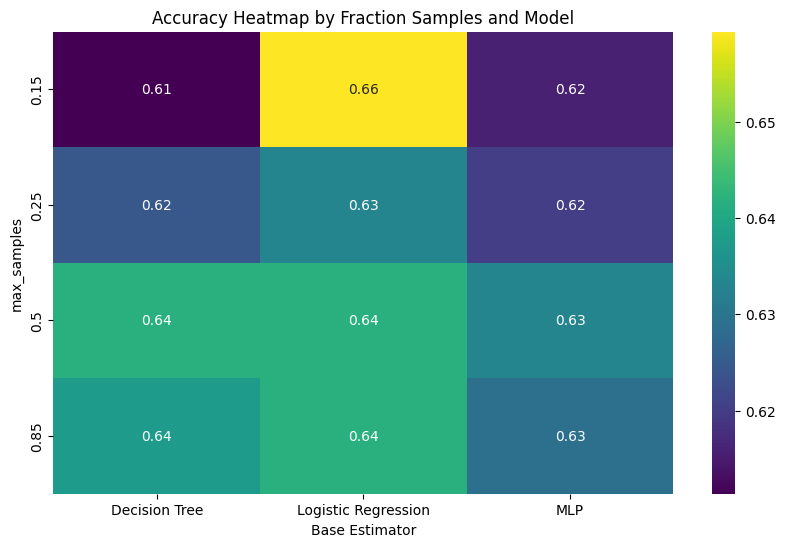

In [223]:
df = pd.DataFrame(sorted_results)
df = df.drop_duplicates(subset=['Base Estimator', 'max_samples'])

heatmap_data = df.pivot(
    index="max_samples",
    columns="Base Estimator",
    values="Validation Accuracy",
)

print(heatmap_data)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Accuracy Heatmap by Fraction Samples and Model")
plt.show()

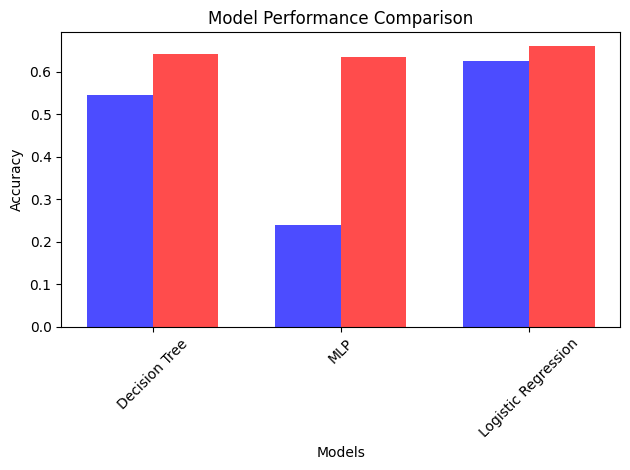

In [224]:
# ChatGPT: Write code for plotting comparision between Bagging and Base models

# Create a dictionary to store the best accuracies for each model
base_models = {
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=15),
    "MLP": MLPClassifier(X_train_wine, y_train_wine, 0.01, 'relu', 2, [8, 8], 100, 'minibatch', 6),
    "Logistic Regression": MultiClassRegression(X_train_wine, y_train_wine, 0.1, 5000)
}

base_model_accuracies = {}
for model_name, base_model in base_models.items():
    base_model.fit(X_train_wine, y_train_wine)
    y_pred = base_model.predict(X_test_wine)
    accuracy = accuracy_score(y_test_wine, y_pred)
    base_model_accuracies[model_name] = accuracy

best_accuracies = {}

for result in results:
    model = result["Base Estimator"]
    accuracy = result["Validation Accuracy"]
    
    if model in best_accuracies:
        best_accuracies[model] = max(best_accuracies[model], accuracy)
    else:
        best_accuracies[model] = accuracy

model_names = list(best_accuracies.keys())
best_accuracies_values = list(best_accuracies.values())
base_accuracies = list(base_model_accuracies.values())

# Create an array for the x-axis (model names)
x = np.arange(len(model_names))

# Set the width of the bars
width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots()


# Plot the base model accuracies
ax.bar(x, base_accuracies, width, label='Base Models', alpha=0.7, color='blue')

# Plot the best ensemble accuracies
ax.bar(x + width, best_accuracies_values, width, label='Best Ensemble', alpha=0.7, color='red')

# Set the x-axis labels
ax.set_xticks(x + width / 2)
ax.set_xticklabels(model_names)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')

# Add a legend
# ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [59]:
# ChatGPT: Write code for Linear Regression

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            y_predicted = y_predicted.reshape(-1,1)
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r_squared(self, y_true, y_pred):
        y_mean = np.mean(y_true)
        ss_total = np.sum((y_true - y_mean) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def fit_and_evaluate(self, X_train, y_train, X_test, y_test):
        self.fit(X_train, y_train)
        y_pred = self.predict(X_test)
        mse = self.mean_squared_error(y_test, y_pred)
        r2 = self.r_squared(y_test, y_pred)
        return mse, r2

    def get_params(self):
        return {'learning_rate': self.learning_rate, 'n_iterations': self.n_iterations}

# Example usage:
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
mse, r2 = model.fit_and_evaluate(X_train_housing, y_train_housing, X_val_housing, y_val_housing)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 24.61252263431857
R-squared: 0.6538317923014174


In [148]:
# ChatGPT: Write code for tuning LinearRegression

learning_rates = [0.001, 0.01, 0.1]
n_iterations_values = [1000, 2000, 3000]

best_mse = float('inf')
best_r2 = 0
best_params = {}

for lr in learning_rates:
    for n_iterations in n_iterations_values:
        model = LinearRegression(learning_rate=lr, n_iterations=n_iterations)
        mse, r2 = model.fit_and_evaluate(X_train_housing, y_train_housing, X_val_housing, y_val_housing)
        
        # Check if current parameters give better results
        if mse < best_mse and r2 > best_r2:
            best_mse = mse
            best_r2 = r2
            best_params = {
                'learning_rate': lr,
                'n_iterations': n_iterations
            }

print("Best Mean Squared Error:", best_mse)
print("Best R-squared:", best_r2)
print("Best Parameters:", best_params)

Best Mean Squared Error: 24.422977376512378
Best R-squared: 0.656497693036072
Best Parameters: {'learning_rate': 0.1, 'n_iterations': 3000}


In [60]:
# ChatGPT: Write code for BaggingRegressor

class BaggingRegressor:
    def __init__(self, base_regressor, n_estimators, max_samples, bootstrap=True, voting="hard"):
        self.base_regressor = base_regressor
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.bootstrap = bootstrap
        self.voting = voting
        self.regressors = []
        self.losses = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            if self.bootstrap:
                sample_indices = np.random.choice(X.shape[0], size=int(self.max_samples * X.shape[0]), replace=True)
            else:
                sample_indices = np.random.choice(X.shape[0], size=int(self.max_samples * X.shape[0]), replace=False)

            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]
            
            regressor = self.base_regressor.__class__(**self.base_regressor.get_params())
            regressor.fit(X_sampled, y_sampled)
            self.regressors.append(regressor)
            y_pred = regressor.predict(X)
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

        final_loss = 0
        for estimator in self.regressors:
            y_pred = estimator.predict(X)
            loss = np.mean((y - y_pred) ** 2)
            final_loss += loss

        return final_loss

    def predict(self, X):
        if self.voting == "hard":
            predictions = [regressor.predict(X) for regressor in self.regressors]
            return np.mean(predictions, axis=0)
        elif self.voting == "soft":
            predictions = [regressor.predict(X) for regressor in self.regressors]
            return np.mean(predictions, axis=0)

    def get_loss(self, X, y):
        loss = 0
        for estimator in self.regressors:
            y_pred = estimator.predict(X)
            loss = np.mean((y - y_pred) ** 2)
            loss += loss
        loss /= self.n_estimators
        return loss

    def get_params(self):
        return {'learning_rate': self.learning_rate, 'n_iterations': self.n_iterations}

In [23]:
bagging_regressor = BaggingRegressor(DecisionTreeRegressor(max_depth=15), 10, 0.85, True, "hard")
bagging_regressor.fit(X_train_housing, y_train_housing)
bagging_regressor.predict(X_val_housing)
bagging_regressor.get_loss(X_val_housing, y_val_housing)

26.904068587105627

In [24]:
np.random.seed(42)
mlp_reg = MLPRegression(X_train_housing,y_train_housing,0.0001,'tanh',2,[6, 6],500,'minibatch','MSE',1)
mlp_reg.fit(X_train_housing,y_train_housing)

train_loss = mlp_reg.train_losses
print("Train Loss: " + str(train_loss[-1]))

Train Loss: 13.943226798985581


In [153]:
bagging_regressor = BaggingRegressor(MLPRegression(X_train_housing,y_train_housing,0.0001,'relu',2,[6, 6],500,'minibatch','MSE',1), 10, 0.85, True, "hard")
bagging_regressor.fit(X_train_housing, y_train_housing)
bagging_regressor.predict(X_val_housing)
bagging_regressor.get_loss(X_val_housing, y_val_housing)

5.303638198886939

In [575]:
bagging_regressor = BaggingRegressor(LinearRegression(learning_rate=0.01, n_iterations=1000), 10, 0.85, True, "hard")
bagging_regressor.fit(X_train_housing, y_train_housing)
bagging_regressor.predict(X_val_housing)
bagging_regressor.get_loss(X_val_housing, y_val_housing)

5.358154959714678

In [225]:
# ChatGPT: Write code for tuning BaggingRegressor

base_models = [
    ("Linear Regression", LinearRegression(learning_rate=0.1, n_iterations=3000)),
    ("MLP Regression", MLPRegression(X_train_housing,y_train_housing,0.0001,'relu',2,[6, 6],500,'minibatch','MSE',1)),
    ("Decision Tree Regression", DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=1))
]

n_estimators_values = [5, 10, 20]
max_samples_values = [0.2, 0.5, 0.85]
bootstrap_values = [True, False]
voting_values = ['hard', 'soft']

results = []

for base_name, base_model in base_models:
    
    best_params = None
    best_score = float('inf')
    
    for n_estimators in n_estimators_values:
        for max_samples in max_samples_values:
            for bootstrap in bootstrap_values:
                for voting in voting_values:
                    bagging_regressor = BaggingRegressor(base_regressor=base_model, 
                                                       n_estimators=n_estimators,
                                                       max_samples=max_samples,
                                                       bootstrap=bootstrap,
                                                       voting=voting)
                    
                    bagging_regressor.fit(X_train_housing, y_train_housing)
                    mse = mean_squared_error(y_test_housing, bagging_regressor.predict(X_test_housing))
                    
                    results.append({
                        "Base Estimator": base_name,
                        "n_estimators": n_estimators,
                        "max_samples": max_samples,
                        "Voting": voting,
                        "Validation MSE": mse
                    })

sorted_results = sorted(results, key=lambda x: x["Validation MSE"])

print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+--------------------------+--------------+-------------+--------+--------------------+
|      Base Estimator      | n_estimators | max_samples | Voting |   Validation MSE   |
+--------------------------+--------------+-------------+--------+--------------------+
| Decision Tree Regression |      20      |     0.5     |  soft  | 11.660074517127649 |
|      MLP Regression      |      20      |    0.85     |  soft  | 12.68322070440507  |
| Decision Tree Regression |      10      |     0.5     |  hard  | 12.848221325607744 |
|      MLP Regression      |      10      |    0.85     |  soft  | 13.041108416986269 |
|      MLP Regression      |      10      |    0.85     |  hard  | 13.06017916139373  |
| Decision Tree Regression |      10      |     0.5     |  soft  | 13.089954689692396 |
|      MLP Regression      |      10      |    0.85     |  hard  | 13.138624814199185 |
|      MLP Regression      |      20      |    0.85     |  hard  | 13.14069152026231  |
|      MLP Regression      |    

Base Estimator  Decision Tree Regression  Linear Regression  MLP Regression
max_samples                                                                
0.20                           16.098665          24.140004       16.831379
0.50                           11.660075          25.843474       13.559726
0.85                           13.954639          25.703677       12.683221


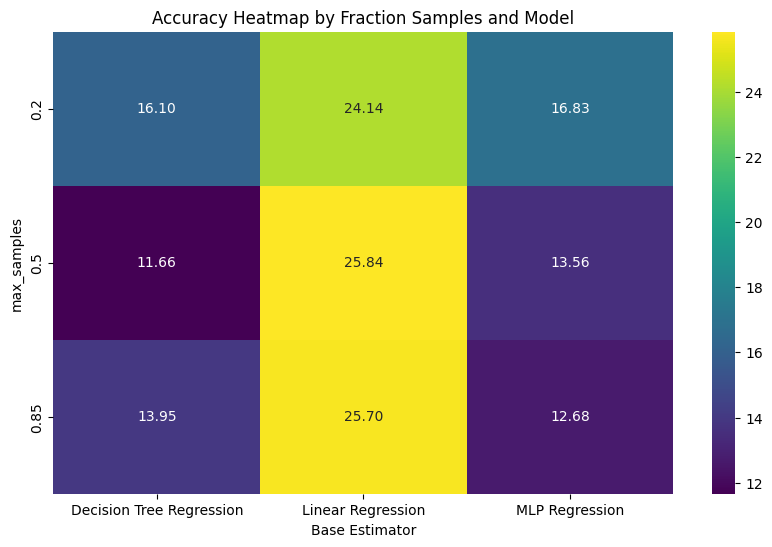

In [226]:
# ChatGPT: Write code for heat map

df = pd.DataFrame(sorted_results)
df = df.drop_duplicates(subset=['Base Estimator', 'max_samples'])

heatmap_data = df.pivot_table(
    index="max_samples",
    columns="Base Estimator",
    values="Validation MSE",
    aggfunc="min"
)

print(heatmap_data)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Accuracy Heatmap by Fraction Samples and Model")
plt.show()

{'Decision Tree Regression': 23.536272719319218, 'MLP Regression': 16.590991585488297, 'Linear Regression': 25.786543016154827}
{'Decision Tree Regression': 11.660074517127649, 'MLP Regression': 12.68322070440507, 'Linear Regression': 24.1400044376707}


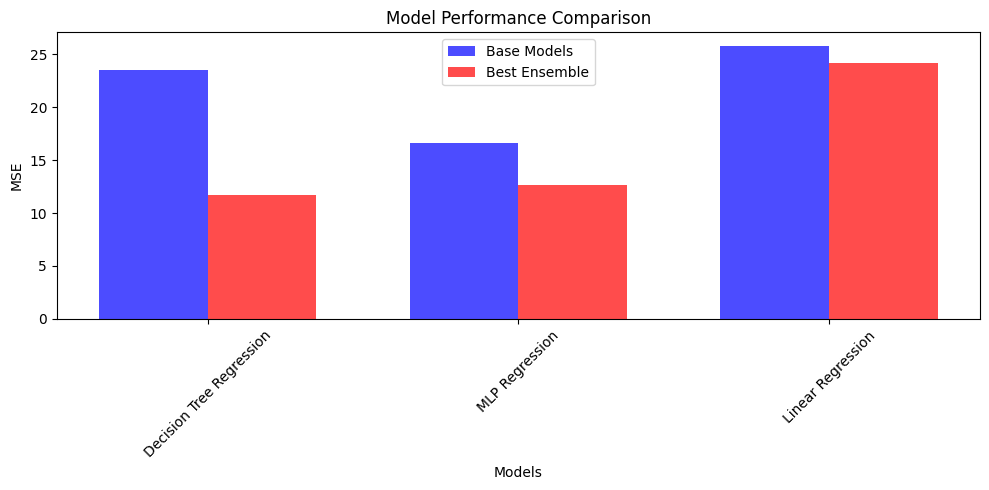

In [229]:
# ChatGPT: Write code for plotting comparision between Bagging and Base models

base_models = [
    ("Decision Tree Regression", DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=1)),
    ("MLP Regression", MLPRegression(X_train_housing,y_train_housing,0.0001,'relu',2,[6, 6],500,'minibatch','MSE',1)),
    ("Linear Regression", LinearRegression(learning_rate=0.1, n_iterations=3000))
]
base_model_mse = {}
for model_name, base_model in base_models:
    base_model.fit(X_train_housing, y_train_housing)
    y_pred = base_model.predict(X_test_housing)
    mse = mean_squared_error(y_test_housing, y_pred)
    base_model_mse[model_name] = mse
    
print(base_model_mse)

best_mse = {}

for result in sorted_results:
    model = result["Base Estimator"]
    mse = result["Validation MSE"]
    
    if model in best_mse:
        best_mse[model] = min(best_mse[model], mse)
    else:
        best_mse[model] = mse

        
print(best_mse)

# Extract model names and accuracies
models = list(base_model_mse.keys())
base_accuracies = list(base_model_mse.values())
ensemble_accuracies = list(best_mse.values())

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(models))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the base model accuracies
ax.bar(index, base_accuracies, bar_width, label='Base Models', alpha=0.7, color='blue')

# Plot the best ensemble accuracies
ax.bar(index + bar_width, ensemble_accuracies, bar_width, label='Best Ensemble', alpha=0.7, color='red')

# Set the x-axis labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('MSE')
ax.set_title('Model Performance Comparison')

# Add a legend
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [230]:
# ChatGPT prompt: Write code for StackingClassifier

class StackingClassifier:
    def __init__(self, level0_estimators, level1_estimators, use_blending=False, n_folds=5):
        self.level0_estimators = level0_estimators
        self.level1_estimators = level1_estimators
        self.use_blending = use_blending
        self.n_folds = None
        if(self.use_blending==False):
            self.n_folds = n_folds

    def fit(self, X, y):
        if self.use_blending:
            self._fit_blending(X_train_wine, y_train_wine, X_val_wine, y_val_wine)
        else:
            self._fit_stacking(X_train_wine, y_train_wine)

    def predict(self, X_test):
        level0_predictions = np.column_stack([
            estimator.predict(X_test) for estimator in self.level0_estimators
        ])

        level1_predictions = np.column_stack([
            estimator.predict(level0_predictions) for estimator in self.level1_estimators
        ])

        return level1_predictions

    def _fit_stacking(self, X_train, y_train):
        kf = KFold(n_splits=self.n_folds)
        level0_features = np.zeros((X_train.shape[0], len(self.level0_estimators)))

        for i, estimator in enumerate(self.level0_estimators):
            fold_predictions = []
            for train_index, test_index in kf.split(X_train):
                estimator_clone = estimator.__class__(**estimator.get_params())
                estimator_clone.fit(X_train[train_index], y_train[train_index])
                fold_predictions.append(estimator_clone.predict(X_train[test_index]))

            level0_features[:, i] = np.concatenate(fold_predictions)

        for estimator in self.level0_estimators:
            estimator.fit(X_train, y_train)

        for estimator in self.level1_estimators:
            estimator.fit(level0_features, y_train)

    def _fit_blending(self, X_train, y_train, X_val, y_val):
        level0_features = np.zeros((X_val.shape[0], len(self.level0_estimators)))

        for i, estimator in enumerate(self.level0_estimators):
            estimator.fit(X_train, y_train)
            level0_features[:, i] = estimator.predict(X_val)
        
        for estimator in self.level1_estimators:
            estimator.fit(level0_features, y_val)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [109]:
level0_estimators = [DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=2, min_samples_leaf=1), MLPClassifier(X_train_wine, y_train_wine, 0.01, 'relu', 2, [8,8], 500, 'minibatch', 6), MultiClassRegression(X_train_wine, y_train_wine, 0.01, 5000)]

level1_estimators =  [MultiClassRegression(X_train_wine, y_train_wine, 0.01, 5000)]
# level1_estimators =  [DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=2, min_samples_leaf=1)]

stacking_classifier = StackingClassifier(level0_estimators=level0_estimators, level1_estimators=level1_estimators, use_blending=False)
stacking_classifier.fit(X_train_wine, y_train_wine)

predictions = stacking_classifier.predict(X_val_wine)
accuracy = stacking_classifier.accuracy(X_val_wine, y_val_wine)
print(f"Stacking Classifier Test Accuracy: {accuracy}")

Stacking Classifier Test Accuracy: 0.5300546448087432


In [237]:
level0_estimators = [DecisionTreeClassifier(criterion="gini", max_depth=10), MLPClassifier(X_train_wine, y_train_wine, 0.01, 'tanh', 2, [8,8], 500, 'minibatch', 6), MultiClassRegression(X_train_wine, y_train_wine, 0.01, 5000)]

level1_estimators =  {
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=15),
    "Logistic Regression": MultiClassRegression(X_train_wine, y_train_wine, 0.1, 5000),
    "MLP": MLPClassifier(X_train_wine, y_train_wine, 0.01, 'relu', 2, [8, 8], 100, 'minibatch', 6)
}

level0_estimators = [[MLPClassifier(X_train_wine, y_train_wine, 0.01, 'tanh', 2, [8,8], 500, 'minibatch', 6), MultiClassRegression(X_train_wine, y_train_wine, 0.01, 5000)],[DecisionTreeClassifier(criterion='gini', max_depth=10), MLPClassifier(X_train_wine, y_train_wine, 0.01, 'tanh', 2, [8,8], 500, 'minibatch', 6)], [DecisionTreeClassifier(criterion="gini", max_depth=10), MLPClassifier(X_train_wine, y_train_wine, 0.01, 'tanh', 2, [8,8], 500, 'minibatch', 6), MultiClassRegression(X_train_wine, y_train_wine, 0.01, 5000)]]

n_folds = [5, 10]
use_blending = [True, False]

# Placeholder to store the performance of each model
results = []

# Iterate over each base model
for level0_estimator in level0_estimators:
    for model_name, base_model in level1_estimators.items():
        for n_fold in n_folds:
            for blending in use_blending:
                base_model.fit(X_train_wine, y_train_wine)
                start_time = time.time()
                stacking_classifier = StackingClassifier(level0_estimators=level0_estimator, level1_estimators=[base_model], use_blending=blending, n_folds=n_fold)
                stacking_classifier.fit(X_train_wine, y_train_wine)
                end_time = time.time()

                stacking_accuracy = stacking_classifier.accuracy(X_test_wine, y_test_wine)
                stacking_train_time = end_time - start_time

                results.append({
                    'Level-0 Model': level0_estimator,
                    'Level-1 Model': f'Stacking_{model_name}',
                    'No Folds': n_fold,
                    'Blending': blending,
                    'accuracy': stacking_accuracy,
                    'train_time': stacking_train_time,
                })

# display the results in a nice tabular format after sorting according to the accuracy
performance_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)
print(tabulate.tabulate(performance_results, headers="keys", tablefmt="pretty"))

+-----------------------------------------------------------------------------------------------------------------------------------------------+------------------------------+----------+----------+---------------------+--------------------+
|                                                                 Level-0 Model                                                                 |        Level-1 Model         | No Folds | Blending |      accuracy       |     train_time     |
+-----------------------------------------------------------------------------------------------------------------------------------------------+------------------------------+----------+----------+---------------------+--------------------+
|                    [<__main__.MLPClassifier object at 0x1100b9610>, <__main__.MultiClassRegression object at 0x111a52e10>]                    |    Stacking_Decision Tree    |    10    |   True   | 0.6506550218340611  | 2.3595497608184814 |
|                    [<__main__.

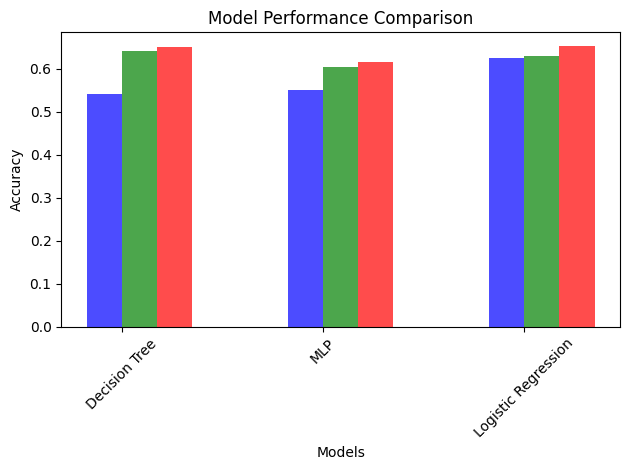

In [245]:
# Create a dictionary to store the best accuracies for each model
base_models = {
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=15),
    "MLP": MLPClassifier(X_train_wine, y_train_wine, 0.01, 'relu', 2, [8, 8], 100, 'minibatch', 6),
    "Logistic Regression": MultiClassRegression(X_train_wine, y_train_wine, 0.1, 5000)
}

base_model_accuracies = {}
for model_name, base_model in base_models.items():
    base_model.fit(X_train_wine, y_train_wine)
    y_pred = base_model.predict(X_test_wine)
    accuracy = accuracy_score(y_test_wine, y_pred)
    base_model_accuracies[model_name] = accuracy


best_accuracies_values_stacking = {"Decision Tree":0.6506550218340611, "MLP":0.6157205240174672, "Logistic Regression":0.65161572052401746 }
best_accuracies_values_bagging = {"Decision Tree":0.6419213973799127, "MLP":0.6031877729257642, "Logistic Regression":0.6293886462882096 }
model_names = list(best_accuracies_values_stacking.keys())
best_accuracies_values_stacking = list(best_accuracies_values_stacking.values())
best_accuracies_values_bagging = list(best_accuracies_values_bagging.values())

base_accuracies = list(base_model_accuracies.values())

# Create an array for the x-axis (model names)
x = np.arange(len(model_names))

# Set the width of the bars
width = 0.175

# Create the figure and axis objects
fig, ax = plt.subplots()


# Plot the base model accuracies
ax.bar(x, base_accuracies, width, label='Base Models', alpha=0.7, color='blue')

# Plot the best ensemble accuracies
ax.bar(x + width, best_accuracies_values_bagging, width, label='Best Ensemble', alpha=0.7, color='green')
ax.bar(x + 2*width, best_accuracies_values_stacking, width, label='Best Ensemble', alpha=0.7, color='red')

# Set the x-axis labels
ax.set_xticks(x + width / 2)
ax.set_xticklabels(model_names)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')

# Add a legend
# ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [66]:
# ChatGPT prompt: Write code for StackingRegressor

class StackingRegressor:
    def __init__(self, level0_estimators, level1_estimators, use_blending=False, n_folds=5):
        self.level0_estimators = level0_estimators
        self.level1_estimators = level1_estimators
        self.use_blending = use_blending
        self.n_folds = None
        if not self.use_blending:
            self.n_folds = n_folds

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        if self.use_blending:
            self._fit_blending(X_train, y_train, X_val_housing, y_val_housing)
        else:
            self._fit_stacking(X_train, y_train)

    def predict(self, X_test):
        level0_predictions = np.column_stack([
            estimator.predict(X_test) for estimator in self.level0_estimators
        ])

        standardized_level0_predictions = self.standardize_predictions(level0_predictions) 

        level1_predictions = np.column_stack([
            estimator.predict(standardized_level0_predictions) for estimator in self.level1_estimators
        ])

        return np.mean(level1_predictions, axis=1)

    def _fit_stacking(self, X_train, y_train):
        kf = KFold(n_splits=self.n_folds)
        level0_features = np.zeros((X_train.shape[0], len(self.level0_estimators)))

        for i, estimator in enumerate(self.level0_estimators):
            fold_predictions = []
            for train_index, test_index in kf.split(X_train):
                estimator_clone = estimator.__class__(**estimator.get_params())
                estimator_clone.fit(X_train[train_index], y_train[train_index])
                predictions = estimator_clone.predict(X_train[test_index])
                if predictions.ndim == 2:
                    predictions = predictions.ravel()
                fold_predictions.append(predictions)

            level0_features[:, i] = np.concatenate(fold_predictions)

        for estimator in self.level0_estimators:
            estimator.fit(X_train, y_train)

        level0_features = self.standardize_predictions(level0_features)

        for estimator in self.level1_estimators:
            estimator.fit(level0_features, y_train)

    def _fit_blending(self, X_train, y_train, X_val, y_val):
        level0_features = np.zeros((X_val.shape[0], len(self.level0_estimators)))

        for i, estimator in enumerate(self.level0_estimators):
            estimator.fit(X_train, y_train)
            predictions = estimator.predict(X_val)
            if predictions.ndim == 2:
                predictions = predictions.flatten()

            level0_features[:, i] = predictions

        level0_features = self.standardize_predictions(level0_features)

        for estimator in self.level1_estimators:
            estimator.fit(level0_features, y_val)

    def standardize_predictions(self, predictions):
        scaler = StandardScaler()
        standardized_predictions = scaler.fit_transform(predictions)
        return standardized_predictions

In [192]:
level0_estimators = [DecisionTreeRegressor(max_depth=20), MLPRegression(X_train_housing, y_train_housing, 0.001, 'relu', 2, [16, 16], 300, 'minibatch','MSE',1)]

level1_estimators =  [DecisionTreeRegressor(max_depth=10)]

stacking_regressor = StackingRegressor(level0_estimators=level0_estimators, level1_estimators=level1_estimators, use_blending=True)
stacking_regressor.fit(X_train_housing, y_train_housing)


predictions = stacking_regressor.predict(X_test_housing)
r2 = r2_score(y_test_housing, predictions)
print("R-squared score:", r2)
print(mean_squared_error(y_test_housing, predictions))

R-squared score: 0.6539446260474339
25.377549754901956


In [246]:
level0_estimators = [[DecisionTreeRegressor(max_depth=10), LinearRegression(learning_rate=0.01, n_iterations=1000)],[DecisionTreeRegressor(max_depth=20), MLPRegression(X_train_housing, y_train_housing, 0.001, 'relu', 2, [16, 16], 300, 'minibatch','MSE',1)]]

level1_estimators =  [[DecisionTreeRegressor(max_depth=10)], [LinearRegression(learning_rate=0.01, n_iterations=1000)], [MLPRegression(X_train_housing, y_train_housing, 0.001, 'relu', 2, [16, 16], 300, 'minibatch','MSE',1)]]

n_folds_range = [3, 5, 7]  # Vary the number of folds for stacking
use_blending_values = [True, False]  # Evaluate the impact of blending

best_mse = float('inf')
best_model = None
best_params = None
results = []

for level0_estimator in level0_estimators:
    for level1_estimator in level1_estimators:
        for n_folds in n_folds_range:
            for use_blending in use_blending_values:
                stacking_regressor = StackingRegressor(level0_estimator, level1_estimator, use_blending, n_folds)
                stacking_regressor.fit(X_train_housing, y_train_housing, X_val_housing, y_val_housing)
                start_time = time.time()
                predictions = stacking_regressor.predict(X_test_housing)
                stacking_train_time = time.time() - start_time
                mse = mean_squared_error(y_test_housing, predictions)
                results.append({
                        'l0_model': f'{level0_estimator}',
                        'l1_model': f'{level1_estimator}',
                        'No Folds': n_folds,
                        'Blending': use_blending,
                        'MSE': mse,
                        'train_time': stacking_train_time,
                    })
                if mse < best_mse:
                    best_mse = mse
                    best_model = stacking_regressor
                    best_params = {'n_folds': n_folds, 'use_blending': use_blending}

print(f"Best Mean Squared Error: {best_mse}")
print(f"Best Model Parameters: {best_params}")

performance_results = sorted(results, key=lambda x: x['MSE'])
print(tabulate.tabulate(performance_results, headers="keys", tablefmt="pretty"))

Best Mean Squared Error: 12.637763358298491
Best Model Parameters: {'n_folds': 3, 'use_blending': False}
+------------------------------------------------------------------------------------------+-----------------------------------------------------+----------+----------+--------------------+------------------------+
|                                         l0_model                                         |                      l1_model                       | No Folds | Blending |        MSE         |       train_time       |
+------------------------------------------------------------------------------------------+-----------------------------------------------------+----------+----------+--------------------+------------------------+
|  [DecisionTreeRegressor(max_depth=20), <__main__.MLPRegression object at 0x113b11050>]   | [<__main__.LinearRegression object at 0x1100e6150>] |    3     |  False   | 12.637763358298491 | 0.0002989768981933594  |
|  [DecisionTreeRegressor(max_depth

{'Decision Tree Regression': 24.154016849069876, 'MLP Regression': 20.8689879153911, 'Linear Regression': 25.786543016154827}


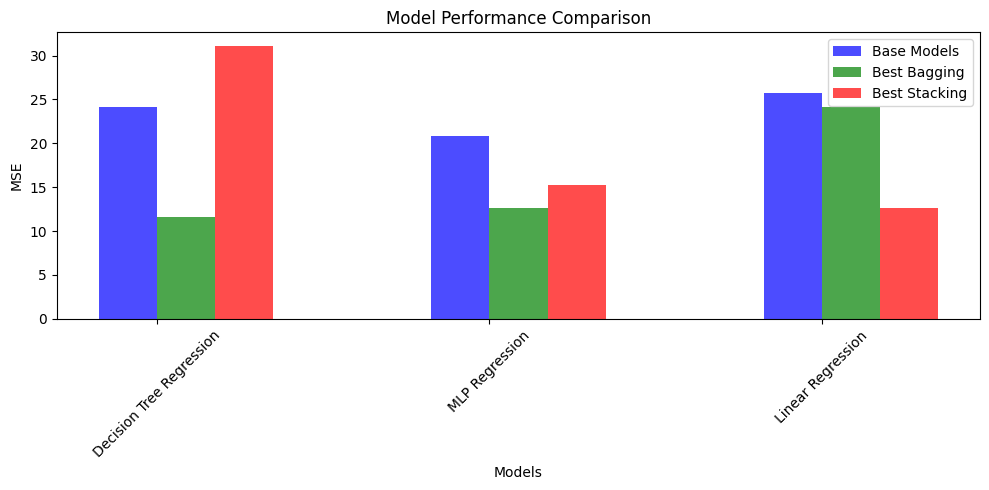

In [250]:
base_models = [
    ("Decision Tree Regression", DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=1)),
    ("MLP Regression", MLPRegression(X_train_housing,y_train_housing,0.0001,'relu',2,[6, 6],500,'minibatch','MSE',1)),
    ("Linear Regression", LinearRegression(learning_rate=0.1, n_iterations=3000))
]
base_model_mse = {}
for model_name, base_model in base_models:
    base_model.fit(X_train_housing, y_train_housing)
    y_pred = base_model.predict(X_test_housing)
    mse = mean_squared_error(y_test_housing, y_pred)
    base_model_mse[model_name] = mse
    
print(base_model_mse)

best_mse_bagging = {"Decision Tree Regression":11.660074517127649 , "MLP Regression":12.68322070440507, "Linear Regression":24.1400044376707 }
best_mse_stacking = {"Decision Tree Regression":31.099439374378072 , "MLP Regression":15.222048889090257, "Linear Regression":12.637763358298491 }

# Extract model names and accuracies
models = list(base_model_mse.keys())
base_accuracies = list(base_model_mse.values())
best_mse_stacking = list(best_mse_stacking.values())
best_mse_bagging = list(best_mse_bagging.values())

# Set the width of the bars
bar_width = 0.175

# Set the positions of the bars on the x-axis
index = np.arange(len(models))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the base model accuracies
ax.bar(index, base_accuracies, bar_width, label='Base Models', alpha=0.7, color='blue')

ax.bar(index + bar_width, best_mse_bagging, bar_width, label='Best Bagging', alpha=0.7, color='green')
ax.bar(index + 2*bar_width, best_mse_stacking, bar_width, label='Best Stacking', alpha=0.7, color='red')

# Set the x-axis labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('MSE')
ax.set_title('Model Performance Comparison')

# Add a legend
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()